![](https://i.imgur.com/0AUxkXt.png)

# Lab 2 - Pandas & Seaborn

## Import libraries

In [2]:
# Your code here
import pandas as pd
import seaborn as sns

## Import data

In this Lab we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days, dinner or lunch and from different table size.

In [3]:
# Run this code
tips = sns.load_dataset('tips')

### Overview

**Show the first 3 rows of the data**

In [4]:
# Your code here
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### Show the last 2 rows of the data

In [5]:
# Your code here
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Show 4 randoms rows

In [7]:
# Your code here
tips.sample(n=4)


,total_bill,tip,sex,smoker,day,time,size
18,16.97,3.50,Female,No,Sun,Dinner,3
72,26.86,3.14,Female,Yes,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2


### Print a concise summary of the data

Print information about the data including the index dtype and column dtypes, non-null values and memory usage.

In [8]:
# Your code here
tips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


### Generate descriptive statistics

A descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [8]:
# Your code here
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## EDA - Exploratory Data Analysis

**What is the min/max of tip?**

In [9]:
# Your code here
print(tips.min()['tip'])
print(tips.max()['tip'])

1.0
10.0


**The restaurant is open on which days of the week?**

*Hint: unique values of the column `day`*

In [10]:
# Your code here
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

**List of unique values in column `time`**

In [11]:
# Your code here
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

**What is the range of table size?**

In [23]:
# Your code here
range(tips['size'].min(),tips['size'].max() + 1)

range(1, 6)

**How many man/woman paid for the dish?**


In [14]:
# Your code here
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

**What is the percentage of smoker table and their revenue?**

In [24]:
# Your code here
(tips['smoker'].value_counts()[0]/(len(tips))) * 100

61.885245901639344

**List 3 tables that have the most expensive bill**

In [35]:
# Your code here
tips.nlargest(3, ['total_bill'])

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


### Group by - Example

**What is the best day to work - maximum tips (sum and percents)?**

In [25]:
tips2 = tips.groupby('day').sum()
tips2['percent'] = tips2['tip'] / tips2['total_bill'] * 100
tips2

,total_bill,tip,size,percent
day,,,,
Thur,1096.33,171.83,152,15.673201
Fri,325.88,51.96,40,15.944519
Sat,1778.40,260.40,219,14.642375
Sun,1627.16,247.39,216,15.203791


**Your turn: Who eats more (and tips more)? smokers or non smokers?**

In [45]:
# Your code here
tips2 = tips.groupby('smoker').sum()
tips2

,total_bill,tip,size
smoker,,,
Yes,1930.34,279.81,224
No,2897.43,451.77,403


### Data Visualization using Seaborn

**Visualize # of tables per day**

*Hint: using the seaborn's function **countplot()** with `x=day` and `data=tips`*

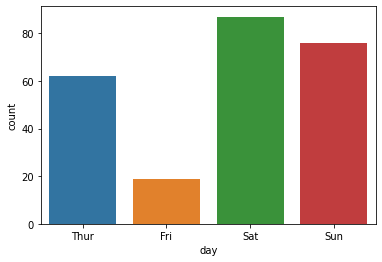

In [49]:
# Your code here
sns.countplot(x="day", data=tips)

**Visualize # of smoker and non-smoker tables**

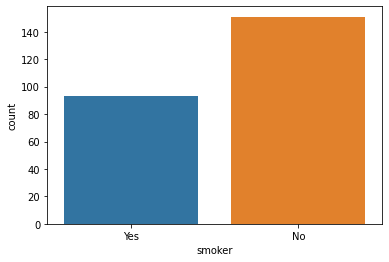

In [50]:
# Your code here
sns.countplot(x="smoker", data=tips)

**Visualize # of male/female customers who pay**

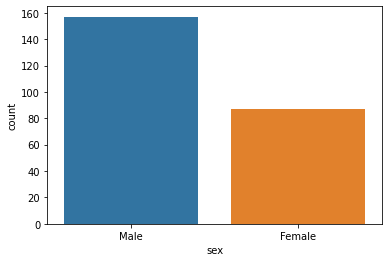

In [51]:
# Your code here
sns.countplot(x="sex", data=tips)

**Analyze the distribution of payments of male and female in different days**

*Hint: countplot with `hue='sex'`*

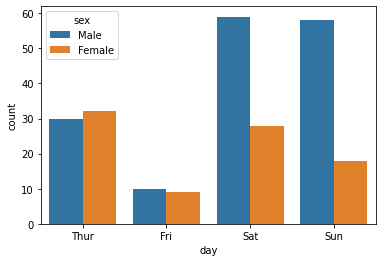

In [55]:
# Your code here
sns.countplot(x = 'day',hue="sex", data=tips)

**Analyze the # of tables in different time (lunch or dinner) and days**

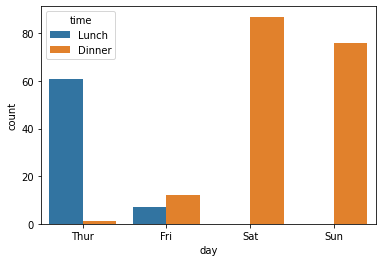

In [60]:
# Your code here
sns.countplot(x = 'day',hue = 'time', data = tips)

**Example: Visualize the distribution of the total bill**


In [1]:
sns.distplot(tips['total_bill'], bins=10)
#tips.head(5)

NameError: name 'sns' is not defined

**Visualize the distribution of the tip**

AttributeError: 'Rectangle' object has no property 'normed'

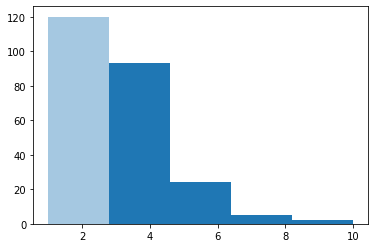

In [67]:
# Your code here
sns.distplot(tips['tip'], bins=5)

**Example: Scatter plot of tip and total bill**

AttributeError: 'Rectangle' object has no property 'normed'

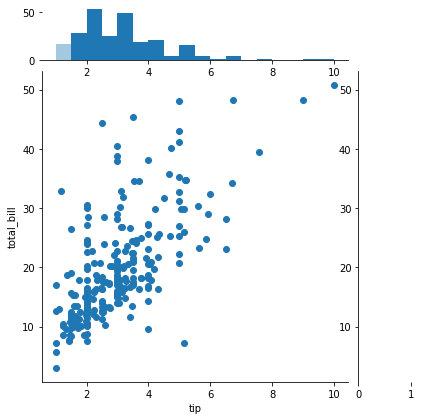

In [68]:
sns.jointplot(x='tip', y='total_bill', data=tips)

**Add one more parameter `kind='hex'` to the previous   `jointplot()` function**

AttributeError: 'Rectangle' object has no property 'normed'

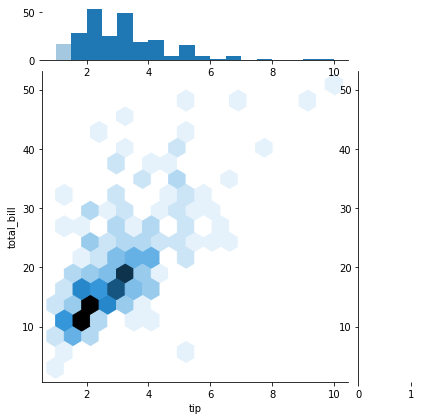

In [71]:
# Your code here
sns.jointplot(x='tip', y='total_bill',kind = 'hex', data=tips)

**Let's try with `kind='kde'` (KDE - Kernel Density Estimation)**

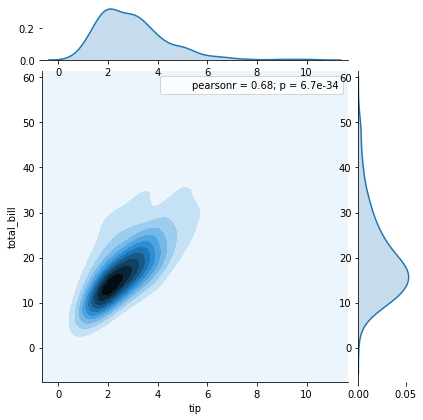

In [72]:
# Your code here
sns.jointplot(x='tip', y='total_bill',kind = 'kde', data=tips)

**Analyze the relationship between `size` and `tip`**

AttributeError: 'Rectangle' object has no property 'normed'

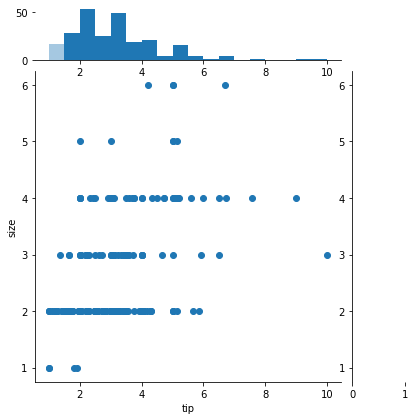

In [73]:
# Your code here
sns.jointplot(x='tip', y= 'size',data=tips)

**Correlation Matrix**

Show the correlation matrix and comfirm the analytics you have from previous steps.

In [ ]:
# Your code here


**Box plot, Swarm plot and Violin plot**

![](https://i.imgur.com/5Lo17qp.png)

**Implement the seaborn's function `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

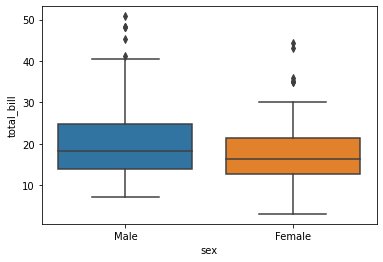

In [74]:
# Your code here
sns.boxplot(x = 'sex',y = 'total_bill',data = tips)

**Implement `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

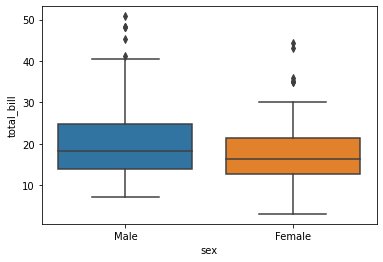

In [75]:
# Your code here
sns.boxplot(x = 'sex',y = 'total_bill',data = tips)

**Add `hue='smoker'` to the previous `boxplot()`**

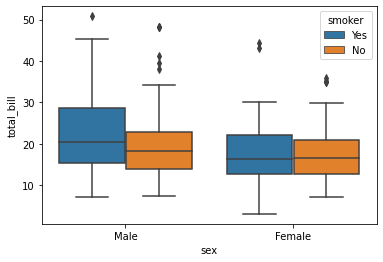

In [76]:
# Your code here
sns.boxplot(x = 'sex',y = 'total_bill',hue = 'smoker',data = tips)

**Implement `swarmplot()` with: `x='day', y='tip', hue='smoker', data=tips`**

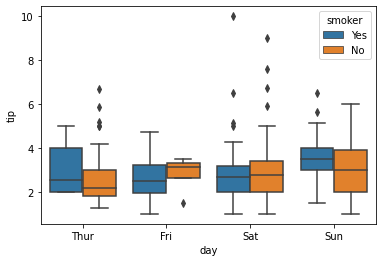

In [78]:
# Your code here
sns.boxplot(x = 'day',y = 'tip',hue = 'smoker', data = tips)

**Implement previous chart with `violinplot()`**

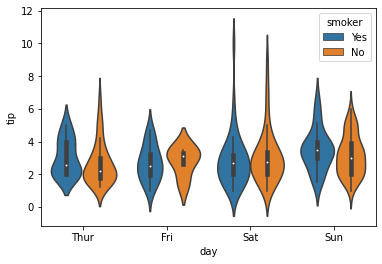

In [79]:
# Your code here
sns.violinplot(x = 'day',y = 'tip',hue = 'smoker', data = tips)

### Bonus

**Total revenue per day**

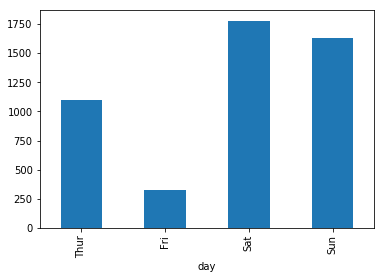

In [ ]:
tips.groupby('day').sum()['total_bill'].plot(kind='bar')

**Pie chart of table size in percentage**

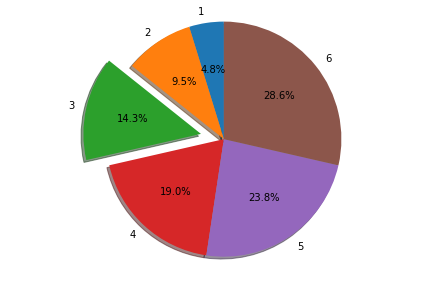

In [ ]:
# Pie chart
labels = []
sizes = []
explode = []

labels = tips['size'].value_counts().index.sort_values()
for index, size in enumerate(labels):
    sizes.append(size)
    if size==3:
        explode.append(0.2)
    else:
        explode.append(0)
 
f, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Great Job!!